# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ahmad Farhan Juliansyah
- **Email:** ahmadfarhan169@gmail.com
- **ID Dicoding:** farhanjuliansyah

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda pada tahun 2011 s/d 2012?
- Berapa banyak orang menyewa sepeda di setiap musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [2]:
# Mengecek isi folder content
file_list = os.listdir('/content/')
print(file_list)

['.config', '.ipynb_checkpoints', 'bike-sharing-dataset', 'all_data.csv', 'sample_data']


In [3]:
# Memuat tabel day
day_df = pd.read_csv("/content/bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Memuat tabel hour
hour_df = pd.read_csv("/content/bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Saya menggunakan Bike Sharing Dataset, jadi pada tahap Data Wrangling saya mengumpulkan kemudian mengimport/memuat dataset day.csv dan hour.csv terlebih dahulu.

### Assessing Data

In [5]:
# Menilai Data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Mengecek nilai missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Rangkuman day_df**
- Jumlah data sama (731).
- Terdapat kesalahan tipe data untuk kolom "dteday", seharusnya menggunakan tipe data datetime bukan object karena merepresentasikan tanggal/waktu.
- Tidak ada missing value.
- Tidak ada duplikasi nilai.
- Tidak ada keanehan pada semua kolom data day_df.

In [9]:
# Menilai Data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# Mengecek nilai missing value
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Rangkuman hour_df**
- Jumlah data sama (17379).
- Terdapat kesalahan tipe data untuk kolom "dteday", seharusnya menggunakan tipe data datetime bukan object karena merepresentasikan tanggal/waktu.
- Tidak ada missing value.
- Tidak ada duplikasi nilai.
- Tidak ada keanehan pada semua kolom data hour_df.

**Insight:**
- Data day_df dan hour_df hanya butuh perbaikan di kolom "dteday" yaitu mengubah tipe data object menjadi datetime.
- Data day_df dan hour_df memiliki jumlah data antar kolom yang sama, tidak ada missing value, tidak ada duplikasi nilai, dan tidak ada keanehan pada semua kolomnya.

### Cleaning Data

In [13]:
# mengganti tipe data day_df pada kolom dteday dari object menjadi datetime

datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
# mengganti tipe data hour_df pada kolom dteday dari object menjadi datetime

datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
# mengubah isi kolom mnth pada day_df: 1->January, 2->February, 3->March, 4->April 5->May, 6->June, 7->July, 8->August, 9->September, 10->October, 11->November, 12->December
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('January','February','March','April', 'May', 'June', 'July','August','September','October','November', 'December'), inplace=True)

<ipython-input-15-d7c53c085c05>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('January','February','March','April', 'May', 'June', 'July','August','September','October','November', 'December'), inplace=True)


In [16]:
# mengubah isi kolom mnth pada day_df: 1->January, 2->February, 3->March, 4->April 5->May, 6->June, 7->July, 8->August, 9->September, 10->October, 11->November, 12->December
hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('January','February','March','April', 'May', 'June', 'July','August','September','October','November', 'December'), inplace=True)

<ipython-input-16-2d3b81eb2a41>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('January','February','March','April', 'May', 'June', 'July','August','September','October','November', 'December'), inplace=True)


In [17]:
# mengubah isi kolom season pada day_df: 1->Spring, 2->Summer, 3->Fall, 4->Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

<ipython-input-17-289ebe5dd1a6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)


In [18]:
# mengubah isi kolom season pada hour_df: 1->Spring, 2->Summer, 3->Fall, 4->Winter
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

<ipython-input-18-7ee978e31feb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)


**Insight:**
- Tipe data kolom dteday pada dataset day_df sudah berubah menjadi datetime
- Tipe data kolom dteday pada dataset hour_df sudah berubah menjadi datetime
- Isi kolom mnth & season pada day_df diubah sesuai kategorinya supaya mudah dipahami
- Isi kolom mnth & season pada hour_df diubah sesuai kategorinya supaya mudah dipahami
- Ket kolom mnth : 1->January, 2->February, 3->March, 4->April 5->May, 6->June, 7->July, 8->August, 9->September, 10->October, 11->November, 12->December
- Ket kolom season: 1->Spring, 2->Summer, 3->Fall, 4->Winter

## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,NaN,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,NaN,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,NaN,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,NaN,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,NaN,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [20]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,NaN,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,NaN,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,NaN,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,NaN,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,NaN,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [21]:
# Menambahkan kolom untuk tahun dan bulan
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month_name()

# Menentukan urutan bulan yang benar
month_order_day = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Mengubah kolom bulan menjadi kategori dengan urutan yang benar
day_df['month'] = pd.Categorical(day_df['month'], categories=month_order_day, ordered=True)

# Mengubah kolom 'year' menjadi kategori untuk memastikan urutan tahun (berdasarAkan dataset: 2011, 2012)
day_df['year'] = pd.Categorical(day_df['year'], categories=[2011, 2012], ordered=True)

# Mengelompokkan berdasarkan bulan dan tahun untuk mengecek jumlah penyewaan sepeda
monthly_stats_day = day_df.groupby(['year', 'month']).agg({
    'cnt': ['min', 'max', 'mean', 'sum']
}).reset_index()

# Menampilkan hasil perhitungan
print(monthly_stats_day)

    year      month   cnt                           
                      min   max         mean     sum
0   2011    January   431  1985  1231.903226   38189
1   2011   February  1005  2927  1721.964286   48215
2   2011      March   605  3239  2065.967742   64045
3   2011      April   795  5312  3162.333333   94870
4   2011        May  2633  5805  4381.322581  135821
5   2011       June  3767  5515  4783.733333  143512
6   2011       July  3285  6043  4559.387097  141341
7   2011     August  1115  5895  4409.387097  136691
8   2011  September  1842  5423  4247.266667  127418
9   2011    October   627  5511  3984.225806  123511
10  2011   November  1495  4486  3405.566667  102167
11  2011   December   705  3940  2816.870968   87323
12  2012    January  1301  4521  3120.774194   96744
13  2012   February  1529  5062  3556.448276  103137
14  2012      March  3194  8362  5318.548387  164875
15  2012      April  1027  7460  5807.466667  174224
16  2012        May  2843  8294  6318.225806  

<ipython-input-21-8220f6133aad>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_stats_day = day_df.groupby(['year', 'month']).agg({


In [22]:
# Menambahkan kolom untuk tahun dan bulan
hour_df['year'] = hour_df['dteday'].dt.year
hour_df['month'] = hour_df['dteday'].dt.month_name()

# Menentukan urutan bulan yang benar
month_order_hour = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Mengubah kolom bulan menjadi kategori dengan urutan yang benar
hour_df['month'] = pd.Categorical(hour_df['month'], categories=month_order_hour, ordered=True)

# Mengubah kolom 'year' menjadi kategori untuk memastikan urutan tahun (berdasarkan dataset: 2011, 2012)
hour_df['year'] = pd.Categorical(hour_df['year'], categories=[2011, 2012], ordered=True)

# Mengelompokkan berdasarkan bulan dan tahun untuk mengecek jumlah penyewaan sepeda
monthly_stats_hour = hour_df.groupby(['year', 'month']).agg({
    'cnt': ['min', 'max', 'mean', 'sum']
}).reset_index()

# Menampilkan hasil perhitungan
print(monthly_stats_hour)

    year      month cnt                         
                    min  max        mean     sum
0   2011    January   1  249   55.507267   38189
1   2011   February   1  327   74.291217   48215
2   2011      March   1  336   87.732877   64045
3   2011      April   1  530  131.947149   94870
4   2011        May   1  611  182.555108  135821
5   2011       June   1  638  199.322222  143512
6   2011       July   1  596  189.974462  141341
7   2011     August   1  651  186.991792  136691
8   2011  September   1  628  177.709902  127418
9   2011    October   1  625  166.232840  123511
10  2011   November   1  553  142.095967  102167
11  2011   December   1  477  117.844804   87323
12  2012    January   1  559  130.558704   96744
13  2012   February   1  610  149.041908  103137
14  2012      March   1  957  221.904441  164875
15  2012      April   1  822  242.651811  174224
16  2012        May   1  873  263.259409  195865
17  2012       June   4  900  281.708333  202830
18  2012       July 

<ipython-input-22-cd333e5032e0>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_stats_hour = hour_df.groupby(['year', 'month']).agg({


In [23]:
# Pendefinisian urutan musim yang benar
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Mengubah kolom 'season' menjadi kategori dengan urutan yang benar
day_df['season'] = pd.Categorical(day_df['season'], categories=season_order, ordered=True)

# mengecek jumlah penyewaan sepeda setiap season berdasarkan data day_df
seasonal_stats_day = day_df.groupby(by='season').agg({
    'cnt': ['min', 'max', 'mean', 'sum']
})

# Menampilkan hasil perhitungan
print(seasonal_stats_day)

         cnt                            
         min   max         mean      sum
season                                  
Spring   431  7836  2604.132597   471348
Summer   795  8362  4992.331522   918589
Fall    1115  8714  5644.303191  1061129
Winter    22  8555  4728.162921   841613


<ipython-input-23-3b1beb1725b9>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_stats_day = day_df.groupby(by='season').agg({


In [24]:
# Pendefinisian urutan musim yang benar
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Mengubah kolom 'season' menjadi kategori dengan urutan yang benar
hour_df['season'] = pd.Categorical(hour_df['season'], categories=season_order, ordered=True)

# mengecek jumlah penyewaan sepeda setiap season berdasarkan data hour_df
seasonal_stats_hour = hour_df.groupby(by='season').agg({
    'cnt': ['min', 'max', 'mean', 'sum']
})

# Menampilkan hasil perhitungan
print(seasonal_stats_hour)

       cnt                          
       min  max        mean      sum
season                              
Spring   1  801  111.114569   471348
Summer   1  957  208.344069   918589
Fall     1  977  236.016237  1061129
Winter   1  967  198.868856   841613


<ipython-input-24-3ae817ce6861>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_stats_hour = hour_df.groupby(by='season').agg({


**Insight:**
- Untuk menunjukan jumlah/sum penyewaan sepeda, data day_df & hour_df menunjukan jumlah yang sama, maka saya memilih salah satunya saja untuk menunjukan performa yaitu day_df karena sudah menjawab pertanyaan bisnis: jumlah berdasarkan tahun dan musim
- Khusus untuk mengetahui performa penyewaan sepeda per tahunnya, dilakukan penyesuaian kategori bulan dan tahun berdasarkan kolom data dteday (datetime)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

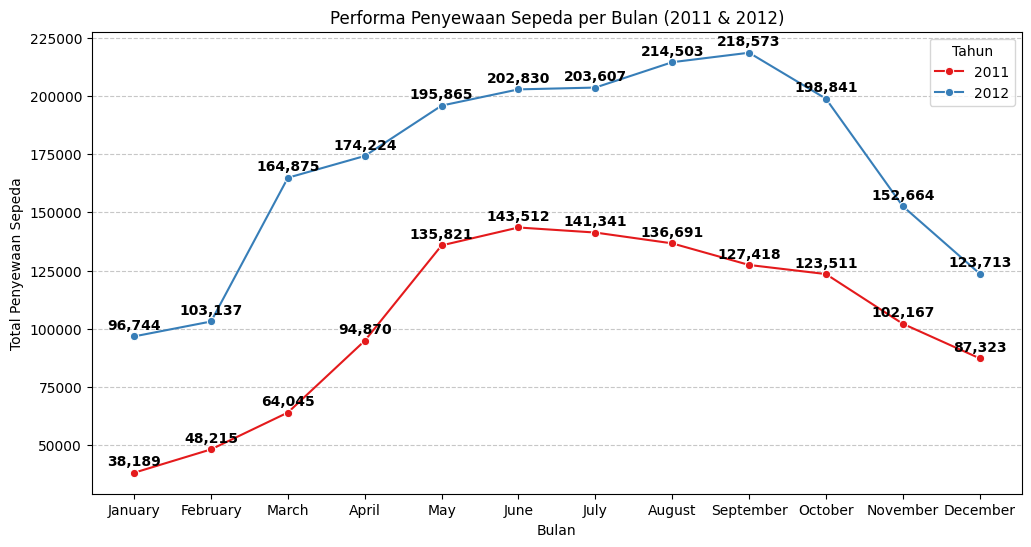

In [25]:
# figure dan axis
plt.figure(figsize=(12, 6))

# plot timeseries
ax = sns.lineplot(
    data=monthly_stats_day,
    x='month',
    y=('cnt', 'sum'),
    hue='year',
    marker='o',
    palette='Set1'
)

# label pada setiap titik data
for line in ax.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        ax.annotate(f'{int(y_value):,}',
                    (x_value, y_value),
                    textcoords="offset points",
                    xytext=(0, 5),
                    ha='center', fontsize=10, fontweight='bold')

# label dan judul
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Performa Penyewaan Sepeda per Bulan (2011 & 2012)")
plt.legend(title="Tahun")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()


### Pertanyaan 2:

<ipython-input-26-dd6f3bd48dc9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


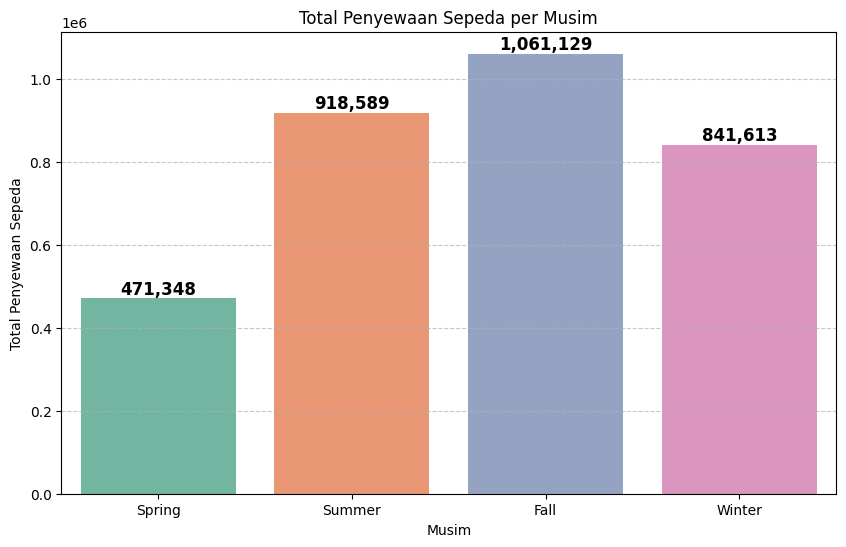

In [26]:
# figure dan axis
plt.figure(figsize=(10, 6))

# barplot untuk total penyewaan sepeda per musim
ax = sns.barplot(
    data=seasonal_stats_day,
    x='season',
    y=('cnt', 'sum'),
    palette='Set2'
)

# label pada setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# label dan judul
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Total Penyewaan Sepeda per Musim")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

**Insight:**
- Visualisasi data pertanyaan pertama menggunakan plot timeseries karena merepresentasikan data dari waktu ke waktu (Januari 2011 - Desember 2012)
- Visualisasi data pertanyaan kedua menggunakan bar plot karena kategori musim hanya ada 4 (Fall, Spring, Summer, Winter) dan berfokus untuk memperlihatkan berapa banyak data yang tersebar di masing-masing musim selama 2 tahun

## Analisis Lanjutan (Opsional)

**Pada project ini saya menggunakan Teknik Analisis Lanjutan Clustering**

## Manual Grouping berdasarkan bulan

In [27]:
day_df.groupby(['month']).agg({
    'cnt': ['count']
})

<ipython-input-27-fa92e2a91f17>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(['month']).agg({


,cnt
,count
month,
January,62
February,57
March,62
April,60
May,62
June,60
July,62
August,62


Dapat disimpulkan orang lebih sering menyewa sepeda pada bulan januari, maret, mei, juli, agustus,oktober, desember dan paling sedikit di bulan februari.

## Manual Grouping berdasarkan season/musim

In [28]:
day_df.groupby(by='season').agg({
    "cnt": ['count']})

<ipython-input-28-ff5128d5c214>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


,cnt
,count
season,
Spring,181
Summer,184
Fall,188
Winter,178


Dapat disimpulkan orang lebih sering menyewa sepeda pada musim fall

## Conclusion

- Conclution pertanyaan 1 "Bagaimana performa penyewaan sepeda pada tahun 2011 s/d 2012?" : Secara performa penyewaan sepeda mengalami peningkatan secara total 1 tahun, dimana tahun 2012 di setiap bulannya jika dibandingkan di bulan yang sama pada tahun 2011 menunjukan peningkatan jumlah penyewaan sepeda. Namun dilihat secara per-tahun, tahun 2011 mulai mengalami penurunan pada bulan juli sedangkan tahun 2012 mulai menurun pada bulan oktober. Puncak paling banyak penyewaan sepeda tahun 2011 di bulan juni dengan jumlah 143.512 sedangkan tahun 2012 ada di bulan september dengan jumlah 218.573
- Conclution pertanyaan 2 "Berapa banyak orang menyewa sepeda di setiap musim?" : Musim Spring berjumlah 471.348, musim summer berjumlah 918.589, musim Fall berjumlah 1.061.129, musim winter berjumlah 841.613. Paling banyak orang menyewa sepeda di musim Fall, dan orang menyewa sepeda paling sedikit di musim Spring.